<h1><center>Dry Beans Classification</center></h1>

#### - The dataset consists of features describing the shape of the bean and the goal is to predict it's type.
#### - This dataset is collected using a computer vision system that extracted shape features from beans images.
#### - In total, 13,611 dry bean samples were obtained, the training data contains 10,834 of them.

#### **Data fields:**
1. **ID**, an ID for this instance.
2. **Area - (A)**, The area of a bean zone and the number of pixels within its boundaries.
3. **Perimeter - (P)**, Bean circumference is defined as the length of its border.
4. **MajorAxisLength - (L)**, The distance between the ends of the longest line that can be drawn from a bean.
5. **MinorAxisLength - (l)**, The longest line that can be drawn from the bean while standing perpendicular to the main axis.
6. **AspectRatio - (K)**, Defines the relationship between L and l : \\(K = \frac{L}{l}\\)
7. **Eccentricity - (Ec)**, Eccentricity of the ellipse having the same moments as the region.
8. **ConvexArea - (C)**, Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
9. **EquivDiameter - (Ed)**, The diameter of a circle having the same area as a bean seed area: \\(E_{d} = \sqrt{\frac{4A}{\pi}}\\)
10. **Extent - (Ex)**, The ratio of the pixels in the bounding box to the bean area \\(Ex = \frac{A}{A_{B}}\\) Where \\(A_{B} = \\) Area of bounding rectangle.
11. **Solidity - (S)**, Also known as convexity. The ratio of the pixels in the convex shell to those found in beans: \\(S = \frac{A}{C}\\)
12. **Roundness - (R)**, Calculated with the following formula: \\(R = \frac{4\pi A}{P^2}\\)
13. **Compactness - (CO)**, Measures the roundness of an object: \\(CO = \frac{E_{d}}{L}\\)
14. **ShapeFactor1** - \\((SF_{1})\\) Calculated with the following formula: \\(SF_{1} = \frac{L}{A}\\)
15. **ShapeFactor2** - \\((SF_{2})\\) Calculated with the following formula: \\(SF_{2} = \frac{l}{A}\\)
16. **ShapeFactor3** - \\((SF_{3})\\) Calculated with the following formula: \\(SF_{3} = \frac{A}{\frac{L}{2}*\frac{L}{2}*\pi}\\)
17. **ShapeFactor4** - \\((SF_{4})\\) Calculated with the following formula: \\(SF_{4} = \frac{A}{\frac{L}{2}*\frac{l}{2}*\pi}\\)
18. **y**, the class of the bean. It can be any of ***BARBUNYA*, *SIRA*, *HOROZ*, *DERMASON*, *CALI*, *BOMBAY*, and *SEKER***.

#### **The general features of the specified dry beans are as follows:**
> - **Cali;** It is white in color, its seeds are slightly plump and slightly larger than dry beans and in shape of kidney.
> - **Horoz;** Dry beans of this type are long, cylindrical, white in color and generally medium in size.
> - **Dermason;** This type of dry beans, which are fuller flat, is white in color and one end is round and the other ends are round.
> - **Seker;** Large seeds, white in color, physical shape is round.
> - **Bombay;** It is white in color, its seeds are very big and its physical structure is oval and bulging.
> - **Barbunya;** Beige-colored background with red stripes or variegated, speckled color, its seeds are large, physical shape is oval close to the round.
> - **Sira;** Its seeds are small, white in color, physical structure is flat, one end is flat, and the other end is round.

<center><img src="https://i.ibb.co/9hb9jKh/Capture.jpg" width=600 height=600/></center>

## **Importing Libraries:**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
sns.set_style("whitegrid")

#Supress Warnings:
import warnings
warnings.filterwarnings('ignore')
SEED=42

## **Training Data EDA:**

In [2]:
dry_beans = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv')
dry_beans = dry_beans.set_index("ID")
dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [3]:
#General Info:
dry_beans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [4]:
#Check for duplicate rows:
dry_beans.duplicated().sum()

0

- #### The dataset is clean:  no missing values or duplicated entries were found.

In [5]:
#Statistical Summary:
dry_beans.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


- #### The features vary greatly in scales, scaling maybe required.

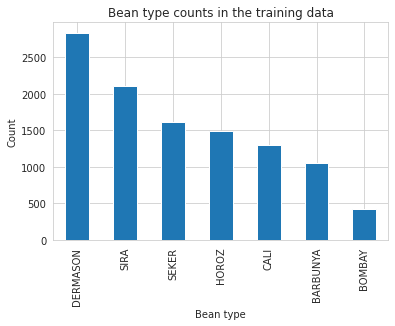

In [6]:
dry_beans["y"].value_counts().plot(kind='bar',
                                   title= "Bean type counts in the training data",
                                   xlabel= 'Bean type',
                                   ylabel= 'Count');

 - There's an imbalance between the count of each class.
 - Dermason is the most frequent class. **(2837)**
 - Bombay is the least frequent class. **(418)**
 - There's a big difference between the 2 classes, which should to be taken into account when building a model.

### **## Features Distributions:**

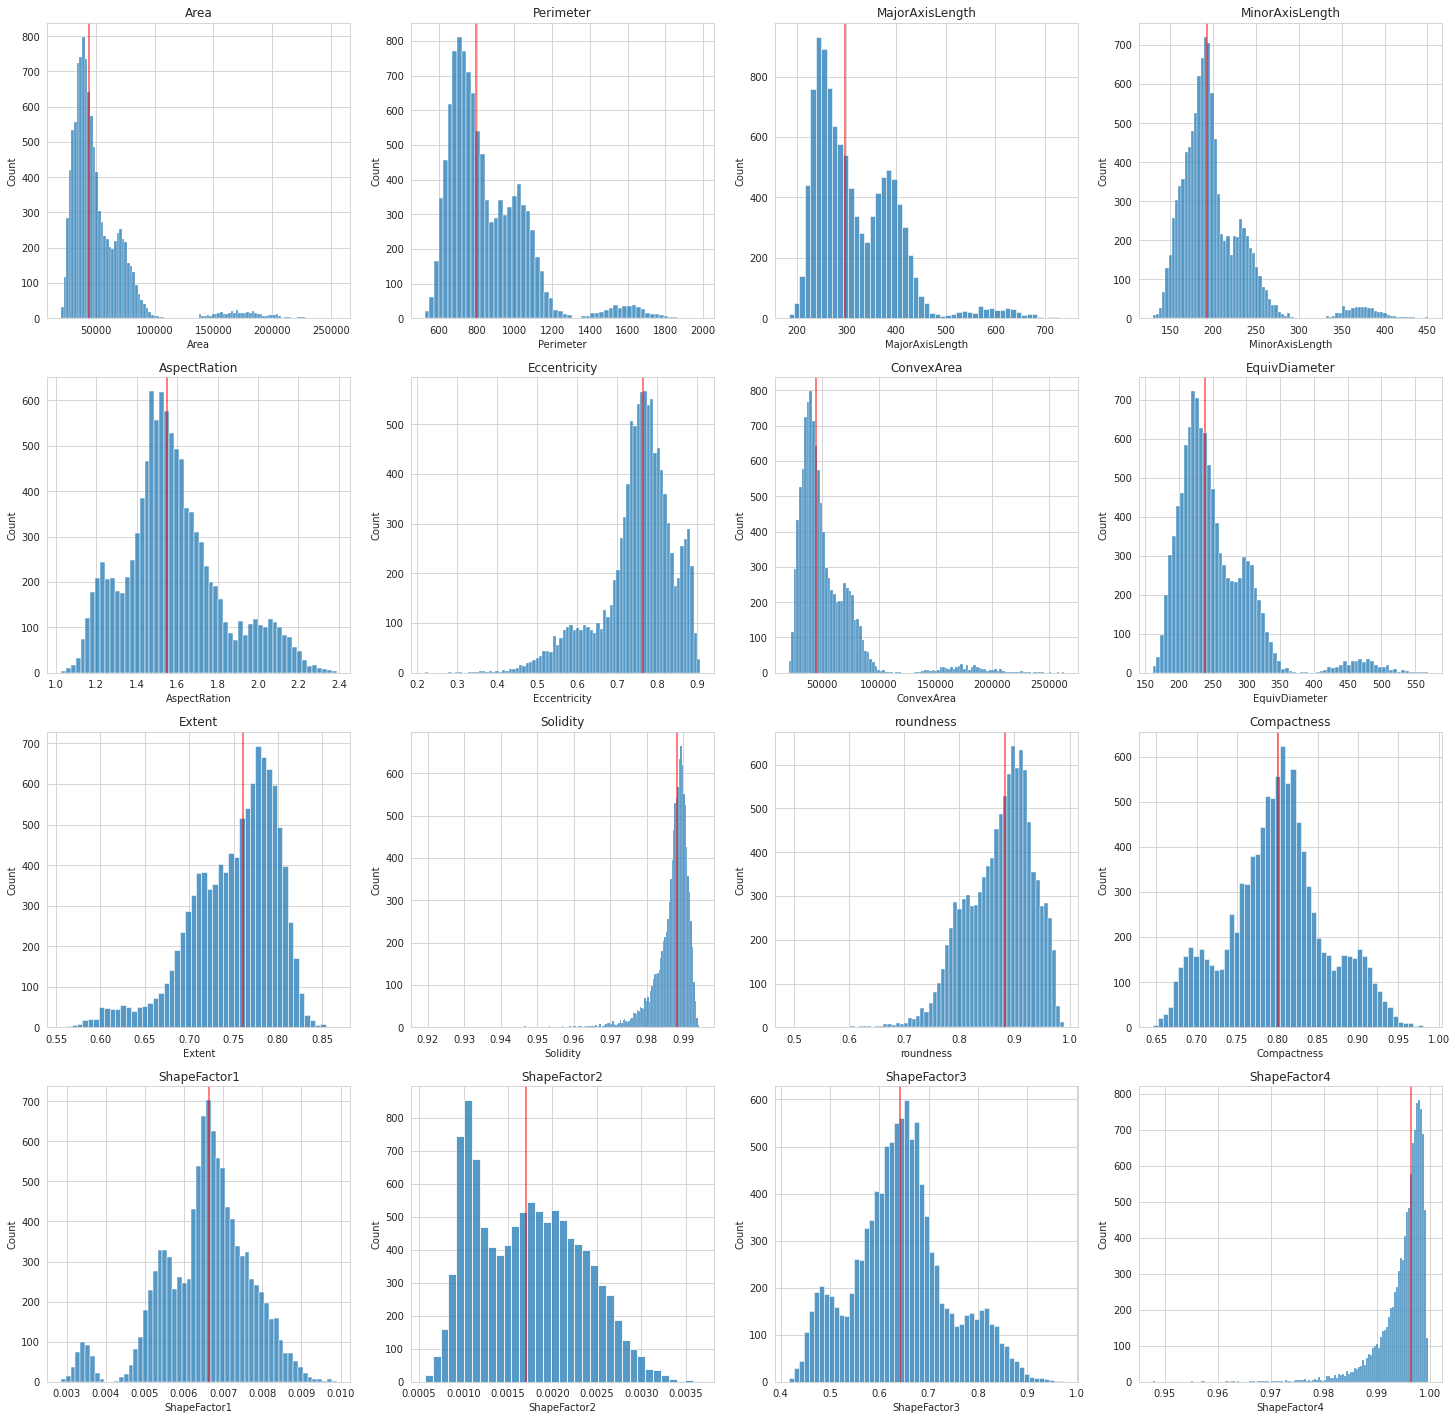

In [7]:
fig , axes = plt.subplots(4,4 , figsize=(25,25))

features = dry_beans.columns.drop('y')

for i in range(4):
    for j in range(4):
        feature_col = features[j + i * 4 ]
        
        sns.histplot(data = dry_beans[feature_col] , ax = axes[i,j])
        median = dry_beans[feature_col].median()
        axes[i,j].set_title(feature_col)
        axes[i,j].axvline(median , color = 'red' , lw = 2 , alpha= .5)
        
        
## Most Features is Skeed 
## Having Outlieres -> We Will Check it

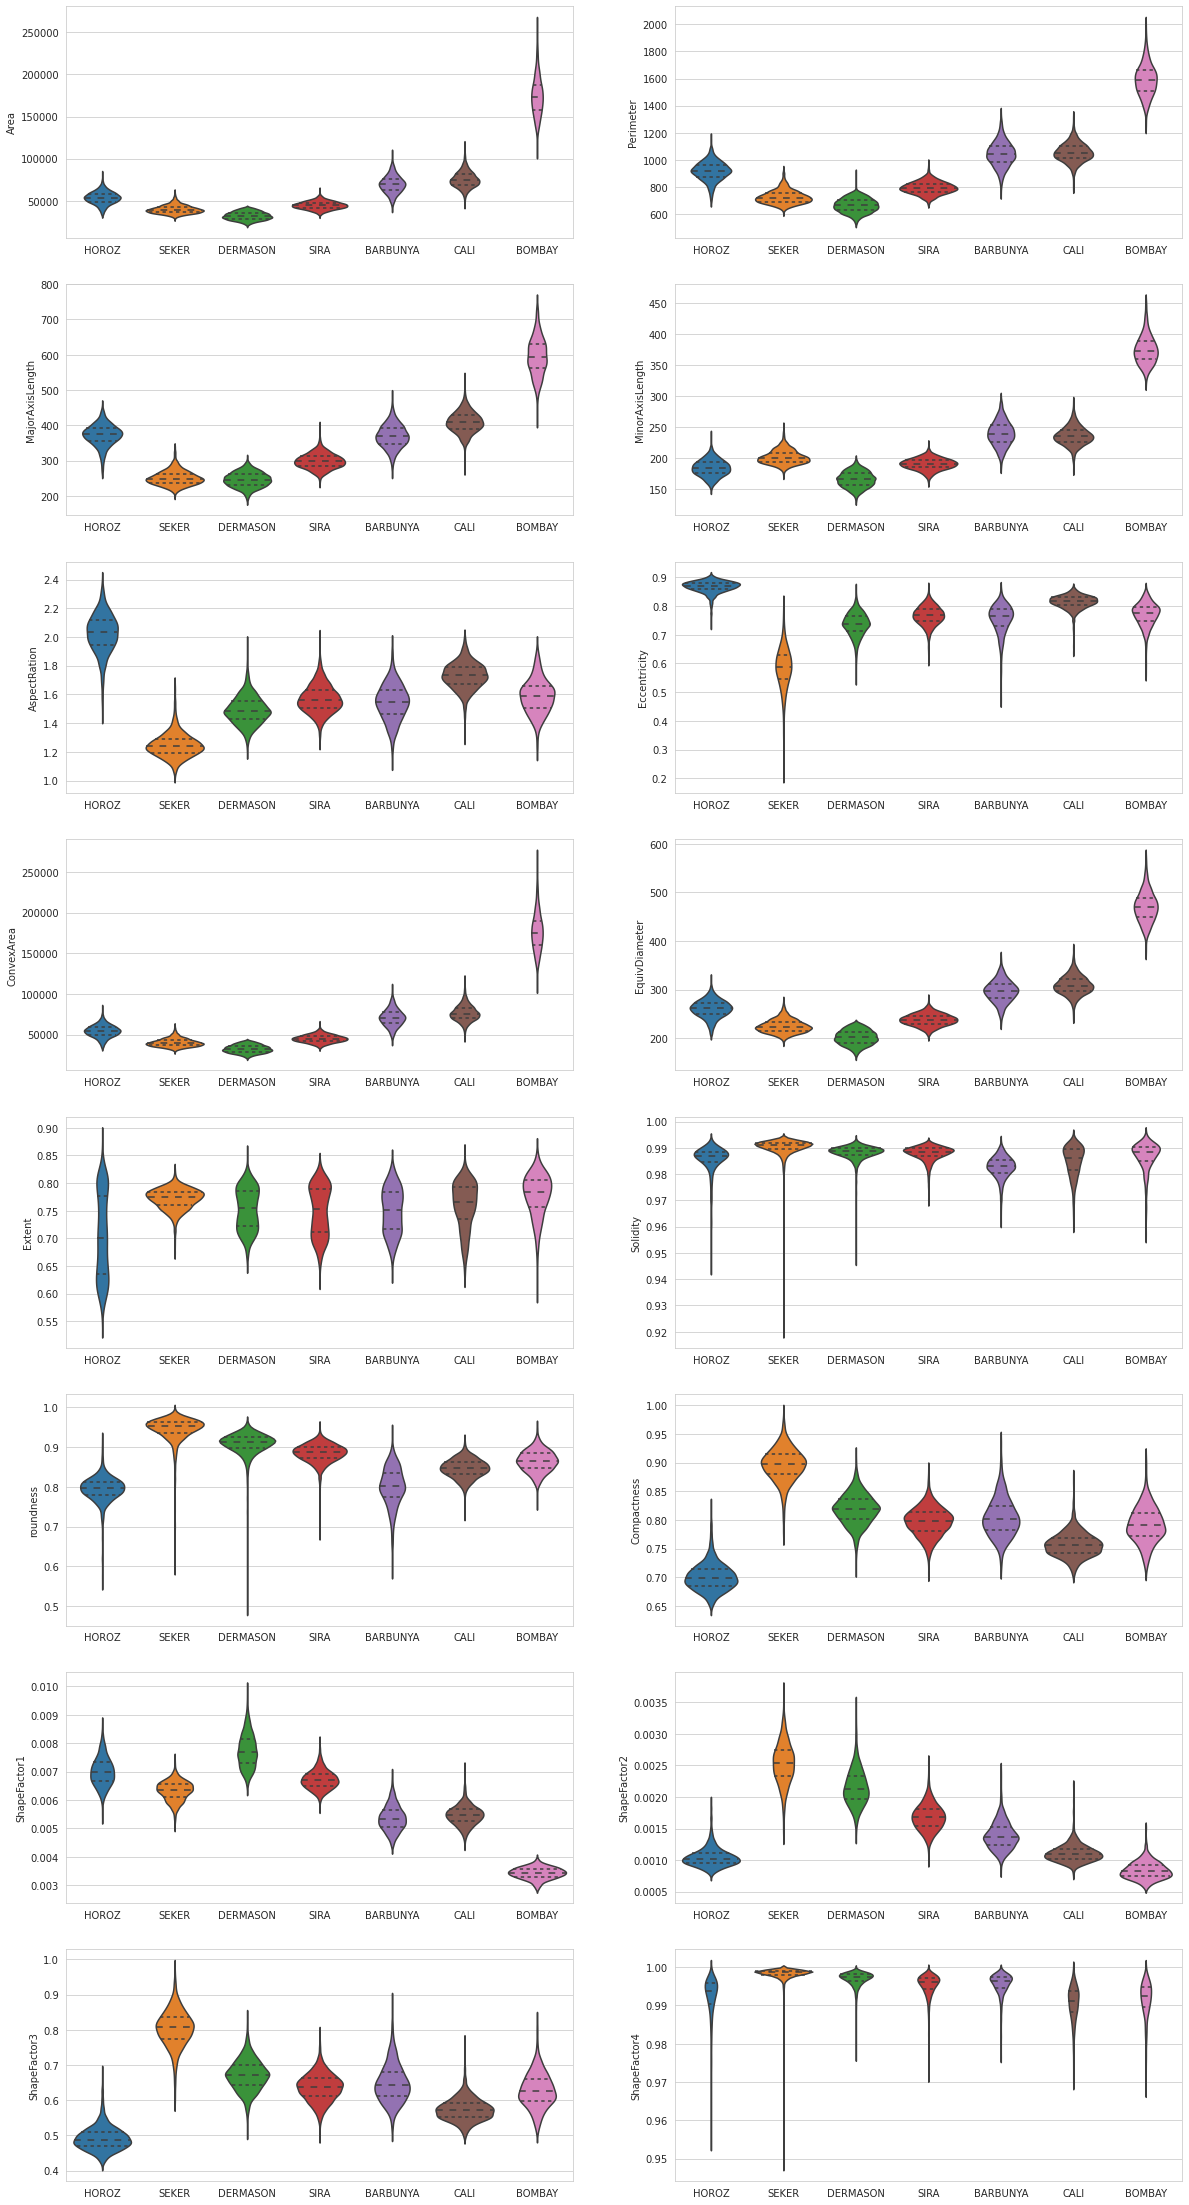

In [8]:
# Draw The Violinplot to Check outlier and see the distrubtion of all features:

fig , axes = plt.subplots(8,2 , figsize=(20,40))

features = dry_beans.columns.drop('y')

for i in range(8):
    for j in range(2):
        feature_col = features[j + i * 2 ]
        
        sns.violinplot(data=dry_beans,
               x="y",
               y=feature_col,
               inner="quartile",
               ax=axes[i,j])
        
        axes[i,j].set_xlabel(None)


## Correlation Matrix:

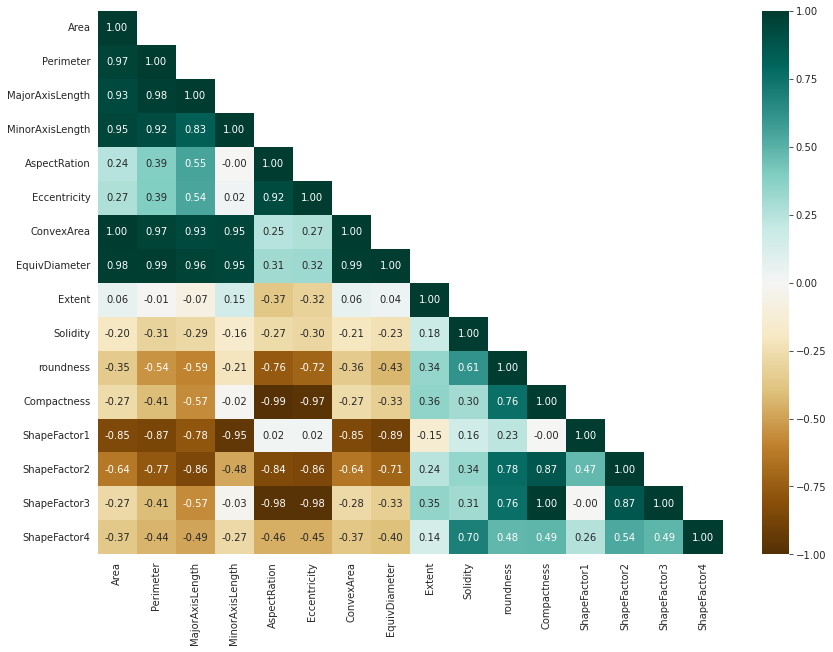

In [9]:
plt.figure(figsize = [14, 10])

corr = dry_beans.corr()
mask  = np.ones_like(corr)
mask[np.tril_indices_from(corr)]= False

with  sns.axes_style("white"):
    sns.heatmap(corr, mask= mask,vmin=-1, vmax=1 ,square=False,annot=True, cmap='BrBG' , fmt = '.2f')

##### - There are a lot of linearly correlated features:
- area & convex area : **1.00**
- compactness & shape factor 3 : **1.00**
- equivalent diameter & perimeter: **0.99**
- equivalent diameter & convex area: **0.99**
- major axis length & perimeter: **0.98**
- area & perimeter: **0.97**
- convex area & perimeter : **0.97**
- major axis length & equivalent diameter : **0.96**
- minor axis length & equivalent diameter : **0.95**
- minor axis length & convex area : **0.95**
- minor axis length & shape factor 1 : **-0.95**
- eccentricity & compactness : **-0.97**
- eccentricity & shape factor 3 : **-0.98**
- aspect ration & shape factor 3 : **-0.98**
- aspect ration & compactness : **-0.99**

##### **- We may try to select features manually, or use PCA to get independent features.**
##### **- If a Tree-based model is used, we may not need to drop any features as they don't get affected by correlated features, but the best practice is to remove them when possible.**

- We can see a linear trend between many features.
- Notice that **Bombay** class is mostly separated from other classes in some features, which means that despite having low count in the dataset, a model may still be able to correctly classify it.
- The classes are clearly clustered within some scatterplots, mainly between the area and perimeter features with all other features.
- Some features **(aspect ration, eccentricity, compactness)** seems to hit a bound when plotted against roundness , which indicates that (in the given data) no outliers occur above that bound.  

### Transformation With PCA in  PipLine :


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures


In [11]:
y= dry_beans['y']
dry_beans.drop('y' , axis=1 , inplace=True)

In [12]:
## Default Pipine 

def log_transform(X):
    return np.log1p(X + 1)

def drop_columns(X):    
    return X.drop('Area' , axis=1)


preprocessor = Pipeline(steps=[
#     ('drop_cols' , FunctionTransformer(drop_columns)),
#     ('log_trans' , FunctionTransformer(log_transform)),
#     ('poly' , PolynomialFeatures(interaction_only=True)),
#     ('std_trans' , StandardScaler()),
    ('power_trans' , PowerTransformer()),
    ('pca', PCA(n_components=12)),

])

In [13]:
## Custome Pipline to SVC

preprocessor_svc = Pipeline(steps=[
#     ('drop_cols' , FunctionTransformer(drop_columns)),
#     ('log_trans' , FunctionTransformer(log_transform)),
       ('poly' , PolynomialFeatures(interaction_only=True)),
#     ('std_trans' , StandardScaler()),
    ('power_trans' , PowerTransformer()),
 
    ('pca', PCA(n_components=12)),

])

## OverSampling The Data Using Smote Approach

In [14]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split , GridSearchCV

# split data with stratify on y label
X_train, X_test, y_train, y_test = train_test_split(dry_beans, y, test_size=0.2, random_state=SEED ,
                                                   stratify=y)
strategy={
    'BOMBAY':700,
    'BARBUNYA':1000,
    'CALI':1300,
    'HOROZ':1600,
    'SEKER':1800,
    'SIRA':2000
    
} 
smote = SMOTE(k_neighbors=5 , random_state=42 ,sampling_strategy=strategy )

X_train_resample , y_train_resample = smote.fit_resample(X_train , y_train)

# X_train.shape , y_train.shape

## Model Selection Step :


### TRY Multiple Model to select the best

In [15]:
# Boosting Algo : 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# xgboost Algo
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

# Trees Based : 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
# Multi Layer Perceptron 
from sklearn.neural_network import MLPClassifier

# SVC 
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score , GridSearchCV 
from sklearn.model_selection import StratifiedShuffleSplit

# F1_score metric
from sklearn.metrics import f1_score

SEED =42
CV = 5



In [16]:

# Declare All Models in dictionary 
all_models ={

    
    "XGBClassifier" : XGBClassifier(random_state =SEED),
    "XGBRFClassifier" : XGBRFClassifier( random_state =SEED),
    "SVC" : SVC(kernel='rbf' , C = 10 , gamma='auto' ,random_state=SEED ),
    "LogisticRegression" : LogisticRegression(penalty='l2' , solver='sag',random_state=SEED),

    #     Stochastic GradentBossting
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators= 100 
                                                              ,subsample = .9  , random_state=SEED),
    "MLPClassifier" : MLPClassifier(solver = 'adam' , random_state= SEED),
}

# Save All Scores to each Model 
scores = []
# StratifiedShuffleSplit obj to split the date to train and test with stratify 
stratified_split = StratifiedShuffleSplit(n_splits=CV , test_size=.1, random_state=SEED)

#loop over all model , fit data , get f1_score 
for key , mdl in  all_models.items():
    
    sub_scores = 0
    pip =  Pipeline(steps = [('pre_preprocessor' , preprocessor) , ('model' , mdl)])
    
    # Cross validation using StratifiedShuffleSplit
    for train_index, test_index in stratified_split.split(X_train_resample, y_train_resample):
    
        trainX, _ = X_train_resample.loc[train_index], X_train_resample.loc[test_index]
        trainY, _ = y_train_resample[train_index], y_train_resample[test_index]


        
        pip.fit(trainX , trainY)

        y_pred = pip.predict(X_test)
        sub_scores += f1_score(y_test , y_pred ,average='weighted')
        
    print('model name :' , key , '\nScore =' , sub_scores.mean() * 100 / CV)
    print('i = ', len(scores))
    scores.append(sub_scores.mean() * 100 / CV)  

    
models_df = pd.DataFrame({'model': list(all_models.keys()) , 'score' : scores})  
models_df.sort_values(by='score', ascending=False)

[18:21:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:21:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

,model,score
5,MLPClassifier,93.585378
2,SVC,93.512163
3,LogisticRegression,92.613452
4,GradientBoostingClassifier,92.373493
0,XGBClassifier,92.071427
1,XGBRFClassifier,91.760089


### GET Classes Weight to Handle Imbalanced Classes 

In [17]:
from sklearn.utils import class_weight
class_w = class_weight.compute_class_weight('balanced',np.unique(y) , y.unique())
class_w

# .compute_sample_weigh

array([1., 1., 1., 1., 1., 1., 1.])

In [18]:
from sklearn.model_selection import train_test_split , GridSearchCV

# # split data with stratify on y label
# X_train, X_test, y_train, y_test = train_test_split(dry_beans, y, test_size=0.2, random_state=SEED ,
#                                                     stratify=y)

    

### HyperParameters Tuning (SVC) 


In [19]:
# # create SVC Pipline  
# svc_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , 
#                                 ('svc' , SVC(random_state = SEED))])

# # Search By these Parms
# parameter_space = {
#     'svc__C': [1 , 10 , 50,100],
#     'svc__kernel': ['rbf', 'linear'],
#     'svc__gamma': ['auto', 'scale',1e-3,1e-4],
#     'svc__degree': [2 , 3],
#     'svc__class_weight' : ['balanced' , None , class_w]
# }


# # Gride Search Obj to Fit our data and return the best parms
# gs_clf = GridSearchCV(svc_pipline, parameter_space,cv=CV ,
#                       scoring='f1_weighted', verbose=1)

# gs_clf.fit(X_train_resample, y_train_resample)

In [20]:
# gs_clf.best_params_

### Check SVC F1_score

In [21]:
# Declare SVC By Tunned Parms
svc_model =  SVC(C = 10 , degree= 2 , gamma='scale' , class_weight='balanced' , probability=True)

svc_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor_svc) , 
                                ('svc' , svc_model)])

# svc_pipline.fit(X_train , y_train)
svc_pipline.fit(X_train_resample , y_train_resample)


y_pred = svc_pipline.predict(X_test)

svc_f1score =f1_score(y_test , y_pred , average='weighted') 
print('svc_f1Score = ' , svc_f1score)

svc_f1Score =  0.9330558920073424


### HyperParameters Tuning (Logestic Regression) 


In [22]:
# lr = LogisticRegression(random_state = SEED , solver = 'sag')
# logestic_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , ('lr' ,lr )])


# # Search By these Parms
# parameter_space = {
# #     'lr__penalty': ['l1','l2'],
#     'lr__C': [1,10,100],
#     'lr__class_weight': ['balanced', None , class_w],
#     'lr__solver' : ['newton-cg' , 'sag']

# }
# # Gride Search Obj to Fit our data and return the best parms
# gs_lr = GridSearchCV(logestic_pipline, parameter_space, cv=CV , scoring='f1_weighted', verbose=1)


# gs_lr.fit(X_train_resample, y_train_resample)


In [23]:
# gs_lr.best_params_

### Check LogesticRegression F1_score

In [24]:
# Declare LR By Tunned Parms
lr_model =  lr = LogisticRegression(random_state = SEED , C = 100, class_weight=None ,
                                    solver = 'newton-cg')
lr_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , 
                                ('lr' , lr_model)])

# lr_pipline.fit(X_train , y_train)
lr_pipline.fit(X_train_resample , y_train_resample)


y_pred = lr_pipline.predict(X_test)

lr_f1score =f1_score(y_test , y_pred , average='weighted') 
print('lr_f1Score = ' , lr_f1score)


lr_f1Score =  0.9300705983989037


In [25]:
# gs_clf.best_params_y_train_resample

## Grid Search on MLP Classifier

In [26]:

# # create our model object m
# mlpc=MLPClassifier(max_iter=500, random_state = SEED , early_stopping=True)

# # declare pipline with MLPC object
# mlpc_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , ('model' , mlpc)])

# # Search By these Parms
# parameter_space = {
#     'model__hidden_layer_sizes': [(13,), (100,) ,(12,3,7), (10,3)],
#     'model__activation': ['tanh', 'segmoid','relu'],
#     'model__solver': ['lbfgs', 'adam'],
#     'model__alpha': [0.0001, .01 , .001],
#     'model__learning_rate_init' : [.001 , .0001 , .01],
#     'model__learning_rate': ['constant','adaptive'],
# }


# # Gride Search Obj to Fit our data and return the best parms
# gs_mlp = GridSearchCV(mlpc_pipline, parameter_space,cv=CV , scoring='f1_weighted', verbose=1)


# gs_mlp.fit(X_train_resample, y_train_resample)


In [27]:
# gs_mlp.best_params_

## Create MLPC with tunned parameters

In [28]:
# Declare MLPC By Tunned Parms
mlpc_model=MLPClassifier(max_iter=500,alpha = .01 , hidden_layer_sizes = (100,),learning_rate='constant',
                   learning_rate_init=.01,
                         solver= 'adam',random_state = SEED , early_stopping=True)


mlpc_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , 
                                ('mlpc' , mlpc_model)])

# mlpc_pipline.fit(X_train , y_train)
mlpc_pipline.fit(X_train_resample , y_train_resample)


y_pred = mlpc_pipline.predict(X_test)

mlpc_f1score =f1_score(y_test , y_pred , average='weighted') 
print('mlpc_f1Score = ' , mlpc_f1score)

mlpc_f1Score =  0.9340414473685935


## Grid Search on stochastic GradientBoostingRegressory_train_resample

In [29]:
# sgbt = GradientBoostingClassifier(random_state=SEED)

# # declare pipline with MLPC object
# sgbt_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , ('sgbt' , sgbt)])


# # Search By these Parms
# parameter_space = {
#     "sgbt__subsample":[.8,.9],
#     "sgbt__max_features" :[.2 , .3],
#     "sgbt__n_estimators": [300 , 350 ,400],
#     "sgbt__max_depth": [1,2],
#     "sgbt__learning_rate" : [.1, .2 , .5]
    
# }


# # Gride Search Obj to Fit our data and return the best parms
# gs_sgbt = GridSearchCV(sgbt_pipline, parameter_space ,cv=CV , scoring='f1_weighted', verbose=1)


# gs_sgbt.fit(X_train, y_train)


In [30]:
# gs_sgbt.best_params_

In [31]:
# Declare SGBT By Tunned Parms
sgbt = GradientBoostingClassifier(max_depth=2 , max_features=.2 ,learning_rate= .1 , n_estimators=400 ,
                                  subsample= .8 ,random_state=SEED)

sgbt_pipline = Pipeline(steps = [('pre_preprocessor' , preprocessor) , 
                                ('sgbt' , sgbt)])

# sgbt_pipline.fit(X_train , y_train)
sgbt_pipline.fit(X_train_resample , y_train_resample)


y_pred = sgbt_pipline.predict(X_test)

sgbt_f1score =f1_score(y_test , y_pred , average='weighted') 
print('mlpc_f1Score = ' , sgbt_f1score)

mlpc_f1Score =  0.9258540526336027


## Create Voting Classifier using All Models Declared Above

In [32]:
from sklearn.ensemble import VotingClassifier

voter = VotingClassifier([('svc', svc_pipline),('lr',lr_pipline ) ,
                          ('mlpc',mlpc_pipline ) , ('sgbt',sgbt_pipline )],voting='soft')

voter.fit(X_train_resample, y_train_resample)

VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('pre_preprocessor',
                                               Pipeline(steps=[('poly',
                                                                PolynomialFeatures(interaction_only=True)),
                                                               ('power_trans',
                                                                PowerTransformer()),
                                                               ('pca',
                                                                PCA(n_components=12))])),
                                              ('svc',
                                               SVC(C=10,
                                                   class_weight='balanced',
                                                   degree=2,
                                                   probability=True))])),
                             ('lr',
                              Pip

In [33]:
# print("The accuracy of the classifier on the validation set is ", 
#       (voter.score(X_test, y_test)))

y_pred = voter.predict(X_test)
f1_score(y_test , y_pred , average='weighted') 

0.9340929560910134

### Try Stacking Techneques:


In [34]:
# from mlxtend.classifier import StackingClassifier

# lr = LogisticRegression(solver = 'sag')  # defining meta-classifier
# svc_meta = SVC()

# # define All Calssifer
# classifiers = [svc_pipline ,lr_pipline  , mlpc_pipline , sgbt_pipline]

# clf_stack = StackingClassifier(classifiers =classifiers, meta_classifier = MLPClassifier(), 
#                                use_probas = True, use_features_in_secondary = True)

# model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
# pred_stack = model_stack.predict(X_test)

# f1_score(y_test , pred_stack , average='weighted') 

## Dealing With Test Set


In [35]:
test_dry_beans = pd.read_csv('/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv' , index_col='ID')
test_dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [36]:
prediction = voter.predict(test_dry_beans)

In [37]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/sample_submission.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/train.csv
/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/test.csv


In [38]:
sup_data = pd.DataFrame()
sup_data['ID'] = test_dry_beans.index.values
sup_data['y'] =  prediction
sup_data.head()

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY


In [39]:

sup_data[['ID', 'y']].to_csv('submission.csv', index=False)
